In [1]:
# !wget - O ADMISSIONS.csv.gz https: // www.dropbox.com/s/9sfutd9lz73mfny/ADMISSIONS.csv.gz?dl = 0
# !wget - O DIAGNOSES_ICD.csv.gz https: // www.dropbox.com/s/2b0803b0nv46wno/DIAGNOSES_ICD.csv.gz?dl = 0
# !wget - O NOTEEVENTS.csv.gz https: // www.dropbox.com/s/lhg9q2rgo1zvwsx/NOTEEVENTS.csv.gz?dl = 0
# !wget - O PROCEDURES_ICD.csv.gz https: // www.dropbox.com/s/x25w0sejbj8ta3p/PROCEDURES_ICD.csv.gz?dl = 0
# !gunzip * .gz
# !git clone https: // github.com/bvanaken/clinical-outcome-prediction.git


/usr/bin/zsh: /home/gwan/miniconda3/lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)
zsh:1: no matches found: https://www.dropbox.com/s/9sfutd9lz73mfny/ADMISSIONS.csv.gz?dl=0


# Data Preprocessing

In [1]:
import sys
sys.path.append("clinical-outcome-prediction")
%cd clinical-outcome-prediction/

/home/gwan/Projects/NLP_project/clinical-outcome-prediction


In [9]:
!python tasks/dia/dia.py - -mimic_dir .. / --save_dir dia_data / --admission_only True

/usr/bin/zsh: /home/gwan/miniconda3/lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)
/home/gwan/Projects/NLP_project/clinical-outcome-prediction/tasks/dia/dia.py:27: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  mimic_notes = pd.read_csv(os.path.join(mimic_dir, "NOTEEVENTS.csv"))
/home/gwan/Projects/NLP_project/clinical-outcome-prediction/./tasks/mimic_utils.py:73: FutureWarning: The default value of regex will change from True to False in a future version.
  notes_df['TEXT'] = notes_df['TEXT'].str.replace(r"\n", r"\\n")
/home/gwan/Projects/NLP_project/clinical-outcome-prediction/./tasks/mimic_utils.py:81: FutureWarning: The default value of regex will change from True to False in a future version.
  notes_df[key] = notes_df[key].str.replace(r'\\n', r' ')
/home/gwan/Projects/NLP_project/clinical-outcome-prediction/./tasks/mimic_utils.py:81: FutureWarning: The default value of regex will change from 

# Data Preparation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('dia_data/DIA_GROUPS_3_DIGITS_adm_train.csv')
val = pd.read_csv('dia_data/DIA_GROUPS_3_DIGITS_adm_val.csv')
test = pd.read_csv('dia_data/DIA_GROUPS_3_DIGITS_adm_test.csv')
train.head()


,id,text,short_codes
0,159643,CHIEF COMPLAINT: \n\nPRESENT ILLNESS: This 60 ...,"424,428,276,997,427,414,412,V458"
1,147171,CHIEF COMPLAINT: Substernal Chest Pain\n\nPRES...,"410,428,997,427,414,458"
2,199961,CHIEF COMPLAINT: \n\nPRESENT ILLNESS: The pati...,"720,403,707,805,847,E885,780,285,250"
3,136812,CHIEF COMPLAINT: \n\nPRESENT ILLNESS: This is ...,"491,486,280,276,427,426,438,729,244"
4,175700,CHIEF COMPLAINT: s/p rollover MVC with prolong...,"823,481,861,518,285,813,807,E816,883,799,V641,..."


In [3]:
# how many unique codes?
tmp = train['short_codes'].apply(lambda x: x.split(','))
new = []
for i in tmp:
    new.extend(i)
num_train_label = len(set(new))

tmp = val['short_codes'].apply(lambda x: x.split(','))
new = []
for i in tmp:
    new.extend(i)
num_val_label = len(set(new))

tmp = test['short_codes'].apply(lambda x: x.split(','))
new = []
for i in tmp:
    new.extend(i)
num_test_label = len(set(new))

print(num_train_label, num_val_label, num_test_label)


1201 906 1031


In [4]:
# no duplicated ids?
print(
    len(set(train['id'])) == train.shape[0],
    len(set(val['id'])) == val.shape[0], len(set(test['id'])) == test.shape[0]
)


True True True


In [5]:
# no intercect between train and test
len(set(pd.concat([train[['id']], val[['id']]])['id'])) == len(
    set(train['id'])) + len(set(val['id']))


True

In [6]:
len(set(pd.concat([train[['id']], test[['id']]])['id'])) == len(
    set(train['id'])) + len(set(test['id']))


True

In [7]:
len(set(pd.concat([test[['id']], val[['id']]])['id'])) == len(
    set(test['id'])) + len(set(val['id']))


True

In [8]:
combine = pd.concat([train, val, test])
tmp = combine['short_codes'].apply(lambda x: x.split(','))
new = []
for i in tmp:
    new.extend(i)
num_combine_label = len(set(new))
print(num_combine_label)
combine


1236


,id,text,short_codes
0,159643,CHIEF COMPLAINT: \n\nPRESENT ILLNESS: This 60 ...,"424,428,276,997,427,414,412,V458"
1,147171,CHIEF COMPLAINT: Substernal Chest Pain\n\nPRES...,"410,428,997,427,414,458"
2,199961,CHIEF COMPLAINT: \n\nPRESENT ILLNESS: The pati...,"720,403,707,805,847,E885,780,285,250"
3,136812,CHIEF COMPLAINT: \n\nPRESENT ILLNESS: This is ...,"491,486,280,276,427,426,438,729,244"
4,175700,CHIEF COMPLAINT: s/p rollover MVC with prolong...,"823,481,861,518,285,813,807,E816,883,799,V641,..."
...,...,...,...
9824,199621,CHIEF COMPLAINT: Left eye visual changes.\n\nP...,"433,496,401,V102,530,238"
9825,178542,"CHIEF COMPLAINT: Coronary artery disease, aort...","425,396,427,414,451,250,401,272"
9826,152601,CHIEF COMPLAINT: elective core-valve\n\nPRESEN...,"424,428,584,427,585,294,V586,V450,440,V707,272..."
9827,113119,CHIEF COMPLAINT: Nausea and vomiting Major [...,"537,577,V440,530,401,780,789,719,338,303,272,4..."


In [9]:
# create multi-dim code
combine['code_count'] = combine['short_codes'].apply(
    lambda x: len(x.split(',')))
id_code = pd.DataFrame(np.repeat(combine['id'], combine['code_count']))
id_code['code'] = np.hstack(combine['short_codes'].str.split(','))
id_code['binary_value'] = 1
id_code = id_code.pivot(index='id', columns='code').fillna(0)
id_code = id_code.binary_value
text_code = pd.merge(combine, id_code, how='left', left_on='id', right_on='id')
text_code = text_code.drop(columns=['short_codes', 'code_count'])
print(text_code.head())

# check unique id and unique code
assert id_code.shape[0] == combine.shape[0]
assert id_code.shape[1] == num_combine_label
# check: first patient's code 424,428,276,997,427,414,412,V458
assert text_code['424'][0] == 1
assert text_code['428'][0] == 1
assert text_code['276'][0] == 1
assert text_code['997'][0] == 1
assert text_code['427'][0] == 1
assert text_code['414'][0] == 1
assert text_code['412'][0] == 1
assert text_code['V458'][0] == 1


       id                                               text  003  004  005  \
0  159643  CHIEF COMPLAINT: \n\nPRESENT ILLNESS: This 60 ...  0.0  0.0  0.0   
1  147171  CHIEF COMPLAINT: Substernal Chest Pain\n\nPRES...  0.0  0.0  0.0   
2  199961  CHIEF COMPLAINT: \n\nPRESENT ILLNESS: The pati...  0.0  0.0  0.0   
3  136812  CHIEF COMPLAINT: \n\nPRESENT ILLNESS: This is ...  0.0  0.0  0.0   
4  175700  CHIEF COMPLAINT: s/p rollover MVC with prolong...  0.0  0.0  0.0   

   007  008  009  010  011  ...  V870  V872  V874  V880  V881  V882  V901  \
0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   V903  V908  V910  
0   0.0   0.0   0.0  
1   0.0   0.0   0.

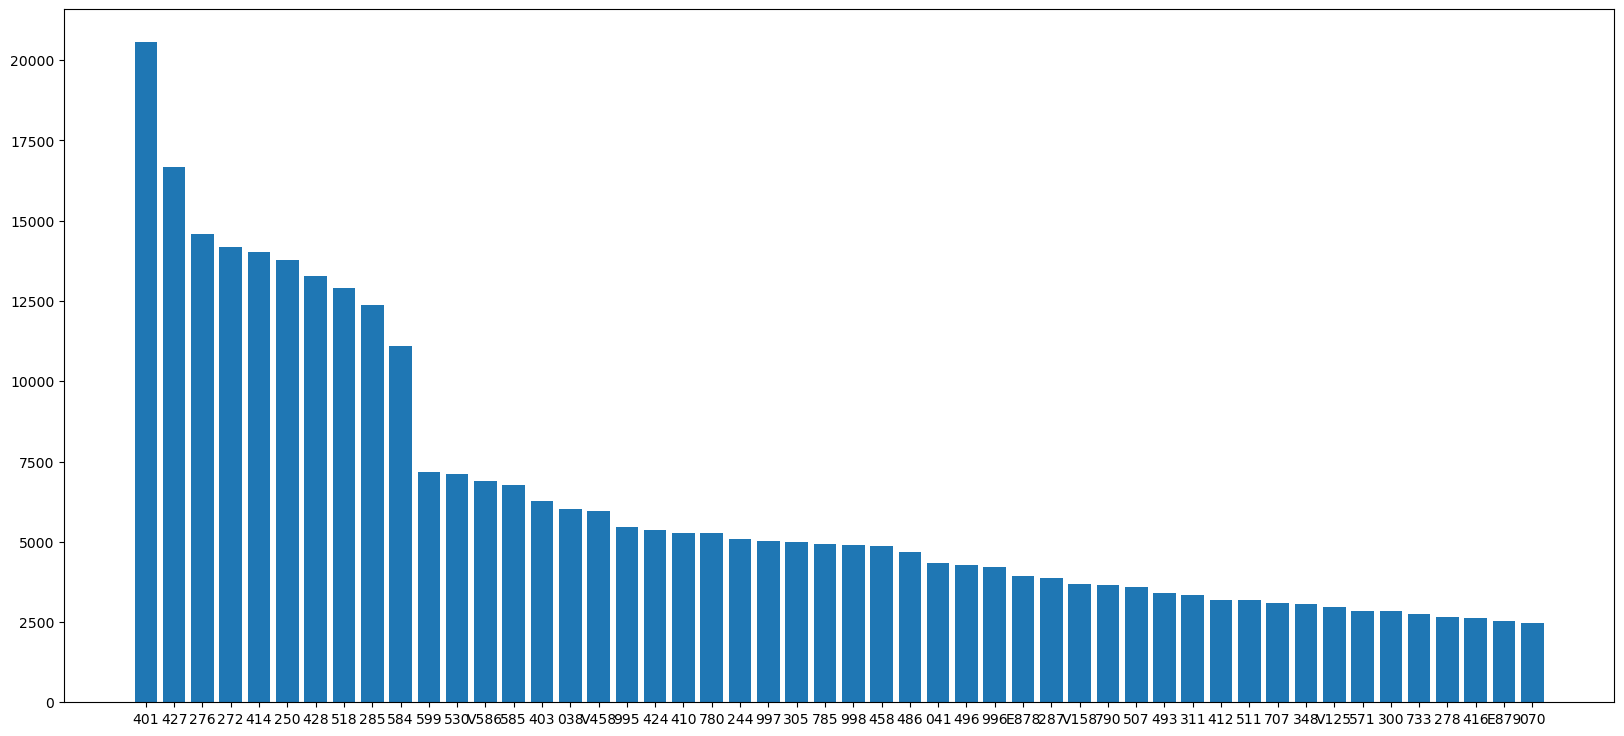

before removing rows (48741, 52)
after removing rows (47533, 52)


In [10]:
cnt_tab = pd.DataFrame(text_code.iloc[:, 2:].sum())
cnt_tab = cnt_tab.rename(columns={0: 'cnt'})
codes = pd.DataFrame(cnt_tab['cnt'].sort_values(ascending=False)).reset_index()
top50code = codes.iloc[:50, :]['index']

# plot
fig, ax = plt.subplots(1, 1, figsize=(20, 9))
plt.bar(codes.iloc[:50, :]['index'], codes.iloc[:50, :]['cnt'])
plt.show()

text_code = text_code[['id', 'text'] + list(top50code)]
print("before removing rows", text_code.shape)

mask = text_code.iloc[:, 2:].sum(axis=1) != 0
text_code = text_code[mask]
print("after removing rows", text_code.shape)


In [11]:
train


,id,text,short_codes
0,159643,CHIEF COMPLAINT: \n\nPRESENT ILLNESS: This 60 ...,"424,428,276,997,427,414,412,V458"
1,147171,CHIEF COMPLAINT: Substernal Chest Pain\n\nPRES...,"410,428,997,427,414,458"
2,199961,CHIEF COMPLAINT: \n\nPRESENT ILLNESS: The pati...,"720,403,707,805,847,E885,780,285,250"
3,136812,CHIEF COMPLAINT: \n\nPRESENT ILLNESS: This is ...,"491,486,280,276,427,426,438,729,244"
4,175700,CHIEF COMPLAINT: s/p rollover MVC with prolong...,"823,481,861,518,285,813,807,E816,883,799,V641,..."
...,...,...,...
33989,122844,CHIEF COMPLAINT: Blood per rectum\n\nPRESENT I...,"584,453,285,428,403,427,287,E947,250,585,412,5..."
33990,145554,CHIEF COMPLAINT: Hemoptysis.\n\nPRESENT ILLNES...,"486,584,428,276,786,496,185,414,458,305,455,274"
33991,152418,CHIEF COMPLAINT: liver mass\n\nPRESENT ILLNESS...,"155,286,998,789,997,578,571,427,585,729,303,E8..."
33992,182558,CHIEF COMPLAINT: ICH\n\nPRESENT ILLNESS: 74 y/...,"430,348,331,250,431,401,V498,429,530,V108"


In [12]:
train_idx = train[['id']]
val_idx = val[['id']]
test_idx = test[['id']]
train_df = pd.merge(train_idx, text_code, left_on='id', right_on='id')
val_df = pd.merge(val_idx, text_code, left_on='id', right_on='id')
test_df = pd.merge(test_idx, text_code, left_on='id', right_on='id')
# assert train_df.shape[0] == train.shape[0]
# assert val_df.shape[0] == val.shape[0]
# assert test_df.shape[0] == test.shape[0]
print(train_df.shape, val_df.shape, test_df.shape)
train_df


(33134, 52) (4793, 52) (9606, 52)


,id,text,401,427,276,272,414,250,428,518,...,707,348,V125,571,300,733,278,416,E879,070
0,159643,CHIEF COMPLAINT: \n\nPRESENT ILLNESS: This 60 ...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,147171,CHIEF COMPLAINT: Substernal Chest Pain\n\nPRES...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,199961,CHIEF COMPLAINT: \n\nPRESENT ILLNESS: The pati...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,136812,CHIEF COMPLAINT: \n\nPRESENT ILLNESS: This is ...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,175700,CHIEF COMPLAINT: s/p rollover MVC with prolong...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33129,170070,"CHIEF COMPLAINT: pneumonia, hypotension, sepsi...",1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33130,122844,CHIEF COMPLAINT: Blood per rectum\n\nPRESENT I...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
33131,145554,CHIEF COMPLAINT: Hemoptysis.\n\nPRESENT ILLNES...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33132,152418,CHIEF COMPLAINT: liver mass\n\nPRESENT ILLNESS...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
train.shape


(33994, 3)

In [14]:
train_df.iloc[0][train_df.columns[2:]].values


array([0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
      dtype=object)

# Tokenization

In [15]:
import numpy as np
import pandas as pd
from sklearn import metrics
import transformers
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertModel, BertConfig
from sklearn.metrics import roc_auc_score
# !pip install transformers
# !pip install pytorch_lightning

In [16]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'


In [20]:
MAX_LEN = 512
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 8
EPOCHS = 1
LEARNING_RATE = 1e-05
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


In [21]:
train_df


,id,text,401,427,276,272,414,250,428,518,...,707,348,V125,571,300,733,278,416,E879,070
0,159643,CHIEF COMPLAINT: \n\nPRESENT ILLNESS: This 60 ...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,147171,CHIEF COMPLAINT: Substernal Chest Pain\n\nPRES...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,199961,CHIEF COMPLAINT: \n\nPRESENT ILLNESS: The pati...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,136812,CHIEF COMPLAINT: \n\nPRESENT ILLNESS: This is ...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,175700,CHIEF COMPLAINT: s/p rollover MVC with prolong...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33129,170070,"CHIEF COMPLAINT: pneumonia, hypotension, sepsi...",1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33130,122844,CHIEF COMPLAINT: Blood per rectum\n\nPRESENT I...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
33131,145554,CHIEF COMPLAINT: Hemoptysis.\n\nPRESENT ILLNES...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33132,152418,CHIEF COMPLAINT: liver mass\n\nPRESENT ILLNESS...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
class CustomDataset(Dataset):

    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.comment_text = dataframe.text
        self.targets = self.data[self.data.columns[2:]].values
        self.max_len = max_len

    def __len__(self):
        return len(self.comment_text)

    def __getitem__(self, index):
        comment_text = str(self.comment_text[index])
        comment_text = " ".join(comment_text.split())

        inputs = self.tokenizer.encode_plus(
            comment_text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]

        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

In [28]:
training_set = CustomDataset(train_df, tokenizer, MAX_LEN)
testing_set = CustomDataset(val_df, tokenizer, MAX_LEN)


In [29]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 8
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
               'shuffle': True,
               'num_workers': 8
               }

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)


In [30]:
training_set.targets.shape


(33134, 50)

In [31]:
OUTPUT_SHAPE = training_set.targets.shape[1]


# Baseline Model

In [32]:
class BERTClass(torch.nn.Module):
    def __init__(self):
        super(BERTClass, self).__init__()
        self.l1 = transformers.BertModel.from_pretrained('bert-base-uncased')
        self.l2 = torch.nn.Dropout(0.3)
        self.l3 = torch.nn.Linear(768, OUTPUT_SHAPE)

    def forward(self, ids, mask, token_type_ids):
        _, output_1 = self.l1(ids, attention_mask=mask,
                              token_type_ids=token_type_ids, return_dict=False)
        output_2 = self.l2(output_1)
        output = self.l3(output_2)
        return output


model = BERTClass()
model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BERTClass(
  (l1): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    

In [33]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

In [34]:
(train_df[train_df.columns[2:]].sum(axis=1) == 1).sum()


1461

In [35]:
optimizer = torch.optim.Adam(params=model.parameters(), lr=LEARNING_RATE)


In [45]:
def roc_auc(probs, labels, multilabel=True, average='macro', multi_class='ovo'):
    if isinstance(labels, list):
        labels = np.array(labels, dtype=int)
    else:
        labels = labels.astype(int)

    y_score = probs

    if multilabel:
        # Exclude columns with only one value, e.g. only false
        dim_size = len(labels[0])
        mask = np.ones((dim_size), dtype=bool)
        for c in range(dim_size):
            if max(labels[:, c]) == 0:
                mask[c] = False
        labels = labels[:, mask]
        y_score = np.array(probs)[:, mask]

        filtered_cols = np.count_nonzero(mask == False)
        # logger.info(f"{filtered_cols} columns not considered for ROC AUC calculation!")

    return roc_auc_score(y_true=labels, y_score=y_score, average=average, multi_class=multi_class)


In [48]:

def train(epoch):
    model.train()
    for _, data in enumerate(training_loader, 0):
        ids = data['ids'].to(device, dtype=torch.long)
        mask = data['mask'].to(device, dtype=torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype=torch.long)
        targets = data['targets'].to(device, dtype=torch.float)

        outputs = model(ids, mask, token_type_ids)

        optimizer.zero_grad()
        loss = loss_fn(outputs, targets)
        if _ % 200 == 0:
            print(f'Steps: {_}')
            print(f'Epoch: {epoch}, Loss:  {loss.item()}')
            try:
                outputs = torch.sigmoid(outputs).cpu().detach().numpy()
                targets = targets.cpu().detach().numpy()
                roc_score_macro = roc_auc(
                    labels=targets, probs=outputs, multi_class="ovr", average="macro")
                print(
                    f'Current training Macro ROC AUC score {roc_score_macro}')
            except:
                print(targets.sum(axis=1))
                print(outputs)
                break
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


In [49]:
for e in range(EPOCHS):
    train(e)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

Steps: 0
Epoch: 0, Loss:  0.532588541507721
Current training Macro ROC AUC score 0.36407450076804915
Steps: 200
Epoch: 0, Loss:  0.4044974446296692
Current training Macro ROC AUC score 0.5242063492063492
Steps: 400
Epoch: 0, Loss:  0.3620680272579193
Current training Macro ROC AUC score 0.5367127496159754
Steps: 600
Epoch: 0, Loss:  0.3756290376186371
Current training Macro ROC AUC score 0.5318164362519201
Steps: 800
Epoch: 0, Loss:  0.3780555725097656
Current training Macro ROC AUC score 0.5489880952380953
Steps: 1000
Epoch: 0, Loss:  0.4366455674171448
Current training Macro ROC AUC score 0.4660034013605442
Steps: 1200
Epoch: 0, Loss:  0.3806592524051666
Current training Macro ROC AUC score 0.5527777777777778
Steps: 1400
Epoch: 0, Loss:  0.3484009802341461
Current training Macro ROC AUC score 0.7338492063492063
Steps: 1600
Epoch: 0, Loss:  0.29269716143608093
Current training Macro ROC AUC score 0.7163333333333333
Steps: 1800
Epoch: 0, Loss:  0.34819990396499634
Current training Macr

In [54]:

def validation(epoch):
    model.eval()
    fin_targets = []
    fin_outputs = []
    with torch.no_grad():
        for _, data in enumerate(testing_loader, 0):
            ids = data['ids'].to(device, dtype=torch.long)
            mask = data['mask'].to(device, dtype=torch.long)
            token_type_ids = data['token_type_ids'].to(
                device, dtype=torch.long)
            targets = data['targets'].to(device, dtype=torch.float)
            outputs = model(ids, mask, token_type_ids)
            fin_targets.extend(targets.cpu().detach().numpy().tolist())
            fin_outputs.extend(torch.sigmoid(
                outputs).cpu().detach().numpy().tolist())
            if _ % 100 == 0:
                try:
                    outputs = torch.sigmoid(outputs).cpu().detach().numpy()
                    targets = targets.cpu().detach().numpy()
                    roc_score_macro = roc_auc(
                        labels=targets, probs=outputs, multi_class="ovr", average="macro")
                    print(
                        f'Current Validation Macro ROC AUC score {roc_score_macro}')
                except:
                    print(targets.sum(axis=1))
                    print(outputs)
    return fin_outputs, fin_targets


for epoch in range(EPOCHS):
    outputs, targets = validation(epoch)
    outputs = torch.sigmoid(torch.FloatTensor(outputs)).numpy()
    targets = torch.FloatTensor(targets)

    roc_score_macro = roc_auc(
        labels=targets, probs=outputs, multi_class="ovr", average="macro")
    print(f'Current EPOCH Validation Macro ROC AUC score {roc_score_macro}')


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

Current Validation Macro ROC AUC score 0.7283482142857143
Current Validation Macro ROC AUC score 0.7985969387755103
Current Validation Macro ROC AUC score 0.7211822660098524
Current Validation Macro ROC AUC score 0.7977225672877847
Current Validation Macro ROC AUC score 0.7846726190476191
Current Validation Macro ROC AUC score 0.7320684523809524


TypeError: sigmoid(): argument 'input' (position 1) must be Tensor, not list

In [69]:
outputs.numpy()


array([[0.562     , 0.55121106, 0.65101284, ..., 0.5109005 , 0.5195934 ,
        0.52043164],
       [0.5728396 , 0.52801543, 0.5719997 , ..., 0.5071115 , 0.51511145,
        0.56817573],
       [0.682462  , 0.5824407 , 0.5503385 , ..., 0.5175148 , 0.51164675,
        0.5058098 ],
       ...,
       [0.601358  , 0.52914155, 0.5964648 , ..., 0.50462615, 0.5092725 ,
        0.5108327 ],
       [0.5586702 , 0.5337823 , 0.5678066 , ..., 0.50767297, 0.51394725,
        0.55663335],
       [0.6259632 , 0.6906521 , 0.6031091 , ..., 0.5260585 , 0.52206904,
        0.5043531 ]], dtype=float32)

In [67]:
targets = torch.FloatTensor(targets)


In [70]:
roc_score_macro = roc_auc(labels=targets.numpy(
), probs=outputs.numpy(), multi_class="ovr", average="macro")


In [71]:
roc_score_macro


0.7433051471889113

# Improved Model


In [ ]:
# class ToxicCommentTagger(pl.LightningModule):
#   def __init__(self, n_classes: int, n_training_steps=None, n_warmup_steps=None):
#     super().__init__()
#     self.bert = BertModel.from_pretrained(BERT_MODEL_NAME, return_dict=True)
#     self.classifier = nn.Linear(self.bert.config.hidden_size, n_classes)
#     self.n_training_steps = n_training_steps
#     self.n_warmup_steps = n_warmup_steps
#     self.criterion = nn.BCELoss()
#   def forward(self, input_ids, attention_mask, labels=None):
#     output = self.bert(input_ids, attention_mask=attention_mask)
#     output = self.classifier(output.pooler_output)
#     output = torch.sigmoid(output)
#     loss = 0
#     if labels is not None:
#         loss = self.criterion(output, labels)
#     return loss, output
#   def training_step(self, batch, batch_idx):
#     input_ids = batch["input_ids"]
#     attention_mask = batch["attention_mask"]
#     labels = batch["labels"]
#     loss, outputs = self(input_ids, attention_mask, labels)
#     self.log("train_loss", loss, prog_bar=True, logger=True)
#     return {"loss": loss, "predictions": outputs, "labels": labels}
#   def validation_step(self, batch, batch_idx):
#     input_ids = batch["input_ids"]
#     attention_mask = batch["attention_mask"]
#     labels = batch["labels"]
#     loss, outputs = self(input_ids, attention_mask, labels)
#     self.log("val_loss", loss, prog_bar=True, logger=True)
#     return loss
#   def test_step(self, batch, batch_idx):
#     input_ids = batch["input_ids"]
#     attention_mask = batch["attention_mask"]
#     labels = batch["labels"]
#     loss, outputs = self(input_ids, attention_mask, labels)
#     self.log("test_loss", loss, prog_bar=True, logger=True)
#     return loss
#   def training_epoch_end(self, outputs):
#     labels = []
#     predictions = []
#     for output in outputs:
#       for out_labels in output["labels"].detach().cpu():
#         labels.append(out_labels)
#       for out_predictions in output["predictions"].detach().cpu():
#         predictions.append(out_predictions)
#     labels = torch.stack(labels).int()
#     predictions = torch.stack(predictions)
#     for i, name in enumerate(LABEL_COLUMNS):
#       class_roc_auc = auroc(predictions[:, i], labels[:, i])
#       self.logger.experiment.add_scalar(f"{name}_roc_auc/Train", class_roc_auc, self.current_epoch)
#   def configure_optimizers(self):
#     optimizer = AdamW(self.parameters(), lr=2e-5)
#     scheduler = get_linear_schedule_with_warmup(
#       optimizer,
#       num_warmup_steps=self.n_warmup_steps,
#       num_training_steps=self.n_training_steps
#     )
#     return dict(
#       optimizer=optimizer,
#       lr_scheduler=dict(
#         scheduler=scheduler,
#         interval='step'
#       )
#     )


Problems:

1. some code in val are not in train
1. onehot encode of code should be float or int?
1. `from pytorch_lightning.metrics import accuracy, f1, auroc` error
1. noisy text